<a href="https://colab.research.google.com/github/karthika1498/text_mining/blob/main/Assignment_of_Text_Mining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [ ]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',   
    
} 

In [ ]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [ ]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
for x in tqdm_notebook(range(1,500)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break 

  0%|          | 0/499 [00:00<?, ?it/s]

In [ ]:
data = pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv', index=False)
data 

,Rating,Title,Review,Review_Date
0,3.0,A overall good product but seemingly incompete...,I have tried several earbuds in the <1500Rs pr...,10 February 2023
1,4.0,Good product,Really good product battery life asaome but...,1 May 2023
2,3.0,Boat really ly has to improve there product qu...,I bought this for my dad looking at the review...,18 March 2023
3,4.0,Worth money,It sounds good and quality of this is good,4 May 2023
4,4.0,Snug fits.,Shows percentage of charge. Easy to use and co...,2 May 2023
...,...,...,...,...
10975,3.0,Problem in earbud,Problem in left earbud..No sound comes from it.,Reviewed in India 🇮🇳 on 1 March 2022
10976,5.0,Good 😊👍👍 earbuds,Good product trending lo una earbuds......But ...,Reviewed in India 🇮🇳 on 30 August 2022
10977,5.0,Sound and battery super,Sounds and battery timing super and same time ...,Reviewed in India 🇮🇳 on 6 October 2022
10978,5.0,Best noise cancellation calling experience!,Ignore the negative reviews and just go for it...,Reviewed in India 🇮🇳 on 3 August 2022


In [ ]:
data=pd.read_csv('Amzon_boat.csv')
data.head()

,Rating,Title,Review,Review_Date
0,3.0,A overall good product but seemingly incompete...,I have tried several earbuds in the <1500Rs pr...,10 February 2023
1,4.0,Good product,Really good product battery life asaome but...,1 May 2023
2,3.0,Boat really ly has to improve there product qu...,I bought this for my dad looking at the review...,18 March 2023
3,4.0,Worth money,It sounds good and quality of this is good,4 May 2023
4,4.0,Snug fits.,Shows percentage of charge. Easy to use and co...,2 May 2023


In [ ]:
Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       10980 non-null  float64
 1   Title        10980 non-null  object 
 2   Review       10671 non-null  object 
 3   Review_Date  10980 non-null  object 
dtypes: float64(1), object(3)
memory usage: 343.2+ KB


In [ ]:
data.Rating.describe()

count    10980.000000
mean         3.612022
std          1.072608
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: Rating, dtype: float64

In [ ]:
data.Review.isna().sum()

309

In [ ]:
data['Review'] = data['Review'].fillna(data['Title'])


review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)

    
data['Review_Date']= review_date[1:] 

In [ ]:
#No. of words in each tweet
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,3.0,I have tried several earbuds in the <1500Rs pr...,737
1,4.0,Really good product battery life asaome but...,41
2,3.0,I bought this for my dad looking at the review...,223
3,4.0,It sounds good and quality of this is good,9
4,4.0,Shows percentage of charge. Easy to use and co...,9


In [ ]:
#No. of Stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop])) 
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328
1,4.0,Really good product battery life asaome but...,41,11
2,3.0,I bought this for my dad looking at the review...,223,90
3,4.0,It sounds good and quality of this is good,9,4
4,4.0,Shows percentage of charge. Easy to use and co...,9,3


In [ ]:
#No. of digits
data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()

,Rating,Review,word_count,stopword_count,digits
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3
1,4.0,Really good product battery life asaome but...,41,11,0
2,3.0,I bought this for my dad looking at the review...,223,90,4
3,4.0,It sounds good and quality of this is good,9,4,0
4,4.0,Shows percentage of charge. Easy to use and co...,9,3,0


In [ ]:
#No. of URLs
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()

,Rating,Review,word_count,stopword_count,digits,web_links
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3,0
1,4.0,Really good product battery life asaome but...,41,11,0,0
2,3.0,I bought this for my dad looking at the review...,223,90,4,0
3,4.0,It sounds good and quality of this is good,9,4,0,0
4,4.0,Shows percentage of charge. Easy to use and co...,9,3,0,0


In [ ]:
data.web_links.value_counts()

0    10980
Name: web_links, dtype: int64

In [ ]:
#No. of Hashtag
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()

,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3,0,0
1,4.0,Really good product battery life asaome but...,41,11,0,0,0
2,3.0,I bought this for my dad looking at the review...,223,90,4,0,0
3,4.0,It sounds good and quality of this is good,9,4,0,0,0
4,4.0,Shows percentage of charge. Easy to use and co...,9,3,0,0,0


In [ ]:
data.hashtag.value_counts()

0    10975
1        5
Name: hashtag, dtype: int64

In [ ]:
data['date'] = data['Review_Date'].str.split(' ').str[0] 
data['Month'] = data['Review_Date'].str.split(' ').str[1] 
data['Year'] = data['Review_Date'].str.split(' ').str[2] 
data[['Review_Date', 'date', 'Month', 'Year']] 

,Review_Date,date,Month,Year
0,10 February 2023,10,February,2023
1,1 May 2023,1,May,2023
2,18 March 2023,18,March,2023
3,4 May 2023,4,May,2023
4,2 May 2023,2,May,2023
...,...,...,...,...
10975,1 March 2022,1,March,2022
10976,30 August 2022,30,August,2022
10977,6 October 2022,6,October,2022
10978,3 August 2022,3,August,2022


In [ ]:
data

,Rating,Title,Review,Review_Date,word_count,stopword_count,digits,web_links,hashtag,date,Month,Year
0,3.0,A overall good product but seemingly incompete...,I have tried several earbuds in the <1500Rs pr...,10 February 2023,737,328,3,0,0,10,February,2023
1,4.0,Good product,Really good product battery life asaome but...,1 May 2023,41,11,0,0,0,1,May,2023
2,3.0,Boat really ly has to improve there product qu...,I bought this for my dad looking at the review...,18 March 2023,223,90,4,0,0,18,March,2023
3,4.0,Worth money,It sounds good and quality of this is good,4 May 2023,9,4,0,0,0,4,May,2023
4,4.0,Snug fits.,Shows percentage of charge. Easy to use and co...,2 May 2023,9,3,0,0,0,2,May,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
10975,3.0,Problem in earbud,Problem in left earbud..No sound comes from it.,1 March 2022,8,2,0,0,0,1,March,2022
10976,5.0,Good 😊👍👍 earbuds,Good product trending lo una earbuds......But ...,30 August 2022,19,0,0,0,0,30,August,2022
10977,5.0,Sound and battery super,Sounds and battery timing super and same time ...,6 October 2022,11,4,0,0,0,6,October,2022
10978,5.0,Best noise cancellation calling experience!,Ignore the negative reviews and just go for it...,3 August 2022,26,9,0,0,0,3,August,2022


In [ ]:
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1 

,Rating,Title,Review,date,Month,Year
0,3.0,A overall good product but seemingly incompete...,I have tried several earbuds in the <1500Rs pr...,10,February,2023
1,4.0,Good product,Really good product battery life asaome but...,1,May,2023
2,3.0,Boat really ly has to improve there product qu...,I bought this for my dad looking at the review...,18,March,2023
3,4.0,Worth money,It sounds good and quality of this is good,4,May,2023
4,4.0,Snug fits.,Shows percentage of charge. Easy to use and co...,2,May,2023
...,...,...,...,...,...,...
10975,3.0,Problem in earbud,Problem in left earbud..No sound comes from it.,1,March,2022
10976,5.0,Good 😊👍👍 earbuds,Good product trending lo una earbuds......But ...,30,August,2022
10977,5.0,Sound and battery super,Sounds and battery timing super and same time ...,6,October,2022
10978,5.0,Best noise cancellation calling experience!,Ignore the negative reviews and just go for it...,3,August,2022


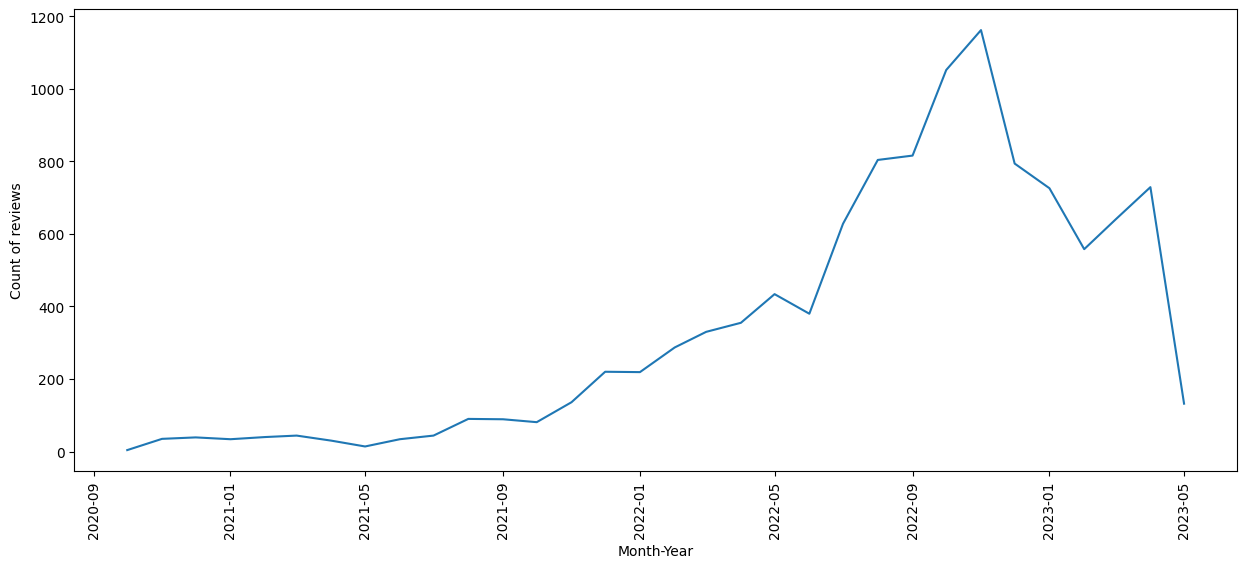

In [ ]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year'] 
a = pd.DataFrame(data['Mo_Year'].value_counts() ) 
a = a.reset_index(level=0)
# convert to date
a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True) 

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'}) 
plt.figure(figsize=(15,6))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show() 

In [ ]:
data2 = data1[['Review']] 
data2 

,Review
0,I have tried several earbuds in the <1500Rs pr...
1,Really good product battery life asaome but...
2,I bought this for my dad looking at the review...
3,It sounds good and quality of this is good
4,Shows percentage of charge. Easy to use and co...
...,...
10975,Problem in left earbud..No sound comes from it.
10976,Good product trending lo una earbuds......But ...
10977,Sounds and battery timing super and same time ...
10978,Ignore the negative reviews and just go for it...


In [ ]:
import re 
corpus = []



for i in range(0, len(data2)):
    
    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits
    
    corpus.append(review)

In [ ]:
corpus

['i have tried several earbuds in the rs price segment and without a doubt it is a good earbud for the price you pay but it has its own set of pros and cons so without further ado the pros and the cons of the product according to me are  marked points are important featuresdownsides of this earphonepros sound and bass the sound and bass of this earbud are exceptionally good for the price the sound and the bass can even be tuned by an eq to suit your audio needs from your phone but in windows i still havent found a way to change eq without using some third party software waterproof yes it is water proof but up to a certain water level and for a certain duration design this point is debatable for this earbud because of its large upper part though it sits comfortably in your ear but it has a tendency to come loose due to certain jerking of the head battery backup of each earbud by far the best thing for this earbud the battery backup is impressive even after using it for hrs at  volume th

In [ ]:
data2['clean_reviews'] = corpus 
data2

,Review,clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...
1,Really good product battery life asaome but...,really good product battery life asaome but...
2,I bought this for my dad looking at the review...,i bought this for my dad looking at the review...
3,It sounds good and quality of this is good,it sounds good and quality of this is good
4,Shows percentage of charge. Easy to use and co...,shows percentage of charge easy to use and com...
...,...,...
10975,Problem in left earbud..No sound comes from it.,problem in left earbudno sound comes from it
10976,Good product trending lo una earbuds......But ...,good product trending lo una earbudsbut delive...
10977,Sounds and battery timing super and same time ...,sounds and battery timing super and same time ...
10978,Ignore the negative reviews and just go for it...,ignore the negative reviews and just go for it...


In [ ]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds rs price segment without...
1,Really good product battery life asaome but...,really good product battery life asaome but...,really good product battery life asaome little...
2,I bought this for my dad looking at the review...,i bought this for my dad looking at the review...,bought dad looking review complements buyers g...
3,It sounds good and quality of this is good,it sounds good and quality of this is good,sounds good quality good
4,Shows percentage of charge. Easy to use and co...,shows percentage of charge easy to use and com...,shows percentage charge easy use comfortable
5,Been using it for over two years now.Pros -Sou...,been using it for over two years nowpros sound...,using two years nowpros sound quality battery ...
6,"I purchased these earphones today , and when I...",i purchased these earphones today and when i ...,purchased earphones today charge case first ti...
7,"I bought it for my wife , once I have checked ...",i bought it for my wife once i have checked a...,bought wife checked found mix results
8,Good audio for music and gaming but poor call ...,good audio for music and gaming but poor call ...,good audio music gaming poor call quality
9,"I like this product.very impressive, sound qua...",i like this productvery impressive sound quali...,like productvery impressive sound quality also...


In [ ]:
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [tried, several, earbuds, rs, price, segment, ...
1    [really, good, product, battery, life, asaome,...
2    [bought, dad, looking, review, complements, bu...
3                        [sounds, good, quality, good]
4    [shows, percentage, charge, easy, use, comfort...
5    [using, two, years, nowpros, sound, quality, b...
6    [purchased, earphones, today, charge, case, fi...
7         [bought, wife, checked, found, mix, results]
8    [good, audio, music, gaming, poor, call, quality]
9    [like, productvery, impressive, sound, quality...
Name: absolute_clean_reviews, dtype: object

In [ ]:
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10) 

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [tried, several, earbuds, r, price, segment, w...
1    [really, good, product, battery, life, asaome,...
2    [bought, dad, looking, review, complement, buy...
3                         [sound, good, quality, good]
4    [show, percentage, charge, easy, use, comforta...
5    [using, two, year, nowpros, sound, quality, ba...
6    [purchased, earphone, today, charge, case, fir...
7          [bought, wife, checked, found, mix, result]
8    [good, audio, music, gaming, poor, call, quality]
9    [like, productvery, impressive, sound, quality...
Name: absolute_clean_reviews, dtype: object

In [ ]:
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds r price segment without ...
1,Really good product battery life asaome but...,really good product battery life asaome but...,really good product battery life asaome little...
2,I bought this for my dad looking at the review...,i bought this for my dad looking at the review...,bought dad looking review complement buyer giv...
3,It sounds good and quality of this is good,it sounds good and quality of this is good,sound good quality good
4,Shows percentage of charge. Easy to use and co...,shows percentage of charge easy to use and com...,show percentage charge easy use comfortable
5,Been using it for over two years now.Pros -Sou...,been using it for over two years nowpros sound...,using two year nowpros sound quality battery l...
6,"I purchased these earphones today , and when I...",i purchased these earphones today and when i ...,purchased earphone today charge case first tim...
7,"I bought it for my wife , once I have checked ...",i bought it for my wife once i have checked a...,bought wife checked found mix result
8,Good audio for music and gaming but poor call ...,good audio for music and gaming but poor call ...,good audio music gaming poor call quality
9,"I like this product.very impressive, sound qua...",i like this productvery impressive sound quali...,like productvery impressive sound quality also...


In [ ]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)  
print(vectorizer.vocabulary_) 

{'tried': 5869, 'several': 5156, 'earbuds': 1807, 'price': 4360, 'segment': 5106, 'without': 6306, 'doubt': 1735, 'good': 2414, 'earbud': 1804, 'pay': 4119, 'set': 5150, 'pro': 4388, 'con': 1263, 'ado': 94, 'product': 4421, 'according': 45, 'marked': 3424, 'point': 4266, 'important': 2788, 'featuresdownsides': 2154, 'earphonepros': 1837, 'sound': 5335, 'bass': 517, 'exceptionally': 2024, 'even': 1987, 'tuned': 5895, 'eq': 1960, 'suit': 5508, 'audio': 380, 'need': 3739, 'phone': 4191, 'window': 6293, 'still': 5440, 'havent': 2611, 'found': 2272, 'way': 6214, 'change': 1031, 'using': 6042, 'third': 5705, 'party': 4100, 'software': 5285, 'waterproof': 6208, 'yes': 6404, 'water': 6207, 'proof': 4498, 'certain': 1007, 'level': 3222, 'duration': 1789, 'design': 1549, 'debatable': 1479, 'large': 3177, 'upper': 5992, 'part': 4092, 'though': 5732, 'sits': 5229, 'comfortably': 1206, 'ear': 1799, 'tendency': 5631, 'come': 1197, 'loose': 3318, 'due': 1778, 'jerking': 3033, 'head': 2613, 'battery':

In [ ]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = ['aa', 'aaa', 'aage', 'aagya', 'aaj', 'aajate', 'aap', 'aapki', 'aata', 'aati', 'aavaj', 'aawaj', 'aawaz', 'aaya', 'ab', 'abhi','accha', 'acche','awaaz', 'awaj', 'awaz','badha', 'badhiya', 'badi', 'badiya'] 

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10) 

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds rs price segment without...
1,Really good product battery life asaome but...,really good product battery life asaome but...,really good product battery life asaome little...
2,I bought this for my dad looking at the review...,i bought this for my dad looking at the review...,bought dad looking review complements buyers g...
3,It sounds good and quality of this is good,it sounds good and quality of this is good,sounds good quality good
4,Shows percentage of charge. Easy to use and co...,shows percentage of charge easy to use and com...,shows percentage charge easy use comfortable
5,Been using it for over two years now.Pros -Sou...,been using it for over two years nowpros sound...,using two years nowpros sound quality battery ...
6,"I purchased these earphones today , and when I...",i purchased these earphones today and when i ...,purchased earphones today charge case first ti...
7,"I bought it for my wife , once I have checked ...",i bought it for my wife once i have checked a...,bought wife checked found mix results
8,Good audio for music and gaming but poor call ...,good audio for music and gaming but poor call ...,good audio music gaming poor call quality
9,"I like this product.very impressive, sound qua...",i like this productvery impressive sound quali...,like productvery impressive sound quality also...


In [ ]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3) 
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

feature_names = list(vectorizer.vocabulary_.keys())
count_df = pd.DataFrame(X, columns=feature_names)
count_df

,tried,several,earbuds,rs,price,segment,without,doubt,good,earbud,...,bit voice,bass quality noice,product looking,sound quality impressive,months boat,fine battery life,evry,gym running,money wasted,buy without
0,2,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10976,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10978,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

feature_names = list(vectorizer.vocabulary_.keys())
count_df_tf_idf = pd.DataFrame(X, columns=feature_names)
count_df_tf_idf

,tried,several,earbuds,rs,price,segment,without,doubt,good,earbud,...,enjoying music,definitely recommend,failed connect,mic quality poor,film,tape,recommend everyone,becouse,experience calling,bad experience calling
0,0.095574,0.027329,0.044073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10975,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10976,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10977,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10978,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Sentiment Analysis
from google.colab import files
uploaded=files.upload()

Saving Afinn.csv to Afinn.csv


In [ ]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1') 
affinity_scores = afinn.set_index('word')['value'].to_dict()
sent = []
a = 0 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = a + affinity_scores[word]
    sent.append(a) 
    a = 0   
data2['sentiment_value'] = sent 
data2[['absolute_clean_reviews', 'sentiment_value']] 

,absolute_clean_reviews,sentiment_value
0,tried several earbuds rs price segment without...,19
1,really good product battery life asaome little...,4
2,bought dad looking review complements buyers g...,-9
3,sounds good quality good,6
4,shows percentage charge easy use comfortable,3
...,...,...
10975,problem left earbudno sound comes,-2
10976,good product trending lo una earbudsbut delive...,3
10977,sounds battery timing super time worth money,5
10978,ignore negative reviews go one best pocket fri...,4


In [ ]:
data2['sentiment'] = data2['sentiment_value'].apply(lambda c: 'Positive' if c >0 else ('Negative' if c<=-1  else 'Neutral'))
data2[['absolute_clean_reviews','sentiment_value','sentiment']]

,absolute_clean_reviews,sentiment_value,sentiment
0,tried several earbuds rs price segment without...,19,Positive
1,really good product battery life asaome little...,4,Positive
2,bought dad looking review complements buyers g...,-9,Negative
3,sounds good quality good,6,Positive
4,shows percentage charge easy use comfortable,3,Positive
...,...,...,...
10975,problem left earbudno sound comes,-2,Negative
10976,good product trending lo una earbudsbut delive...,3,Positive
10977,sounds battery timing super time worth money,5,Positive
10978,ignore negative reviews go one best pocket fri...,4,Positive


In [ ]:
data2.sentiment.value_counts()

Positive    7303
Neutral     2343
Negative    1334
Name: sentiment, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

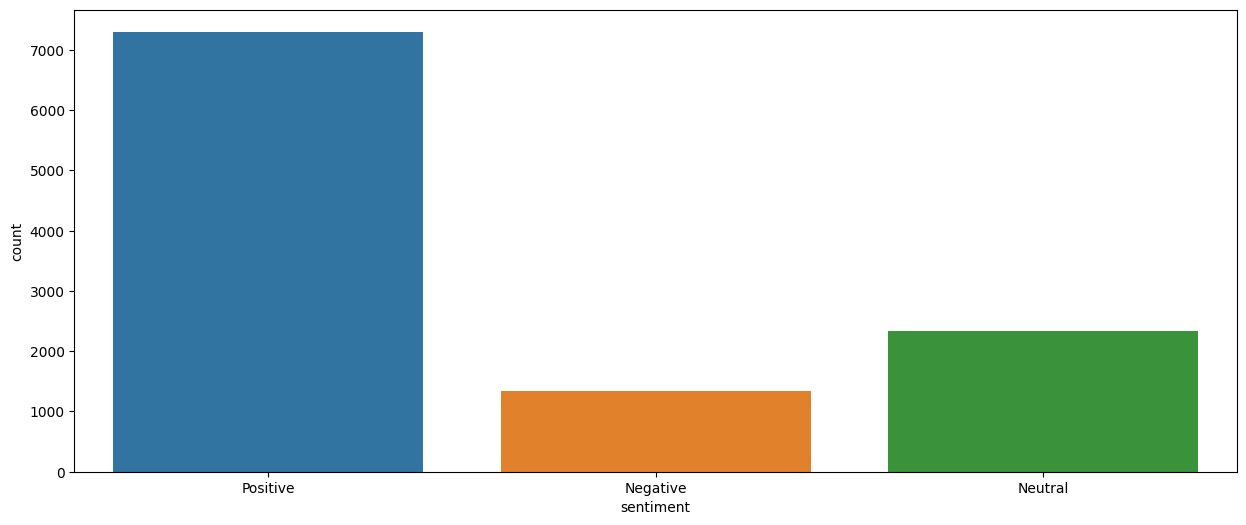

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='sentiment',data=data2)

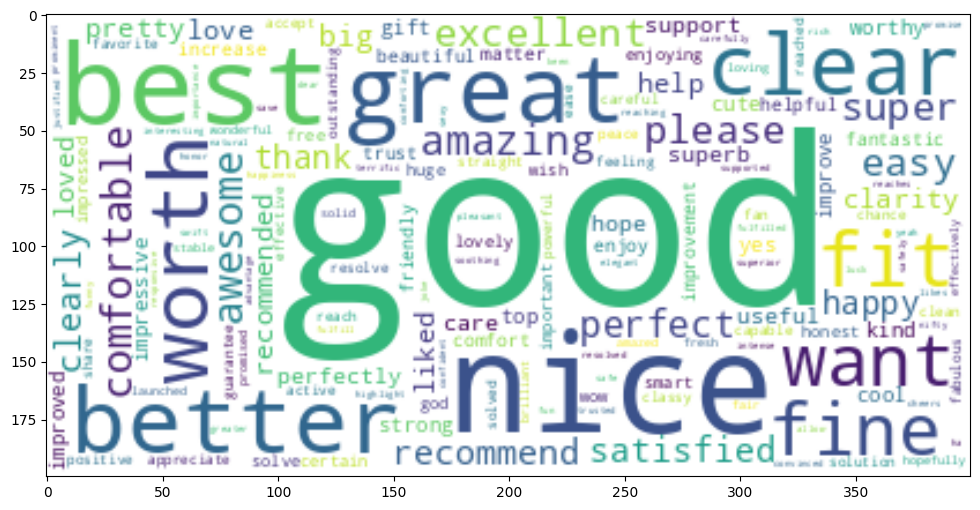

In [ ]:
#word cloud for positive words
positive = []
negative = []
neutral = [] 
for i in range(0,len(data2)):
    
    for j in range(0,len(data2.absolute_clean_reviews[i].split() )):
        
        word = data2.absolute_clean_reviews[i].split()[j]
        if  word in affinity_scores:
            a = affinity_scores[word]
            if a > 0: 
                positive.append(word)
            elif a < 0:
                negative.append(word)
            else :
                neutral.append(word)
  
pos =' '.join(positive) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(pos)
plt.imshow(word_cloud, interpolation='bilinear') 

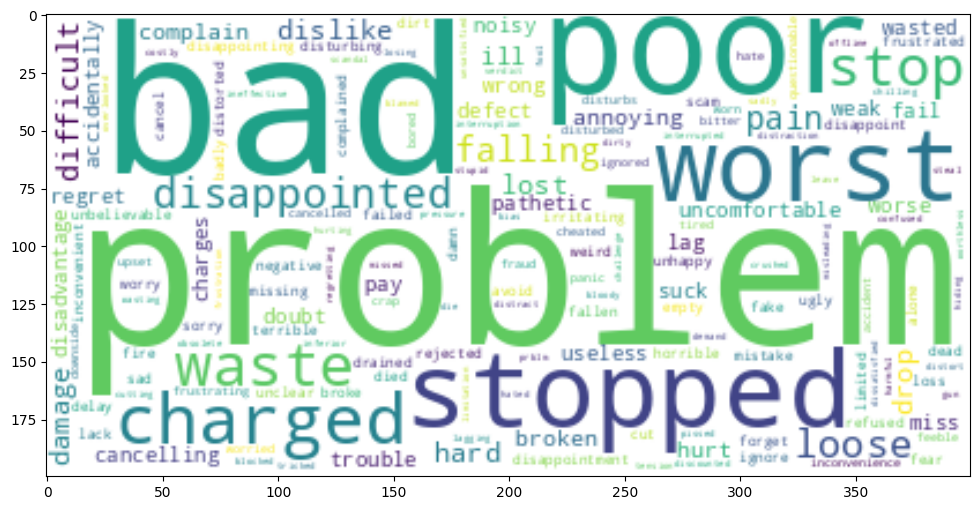

In [ ]:
#word cloud for negative words
neg = ' '.join(negative) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear') 

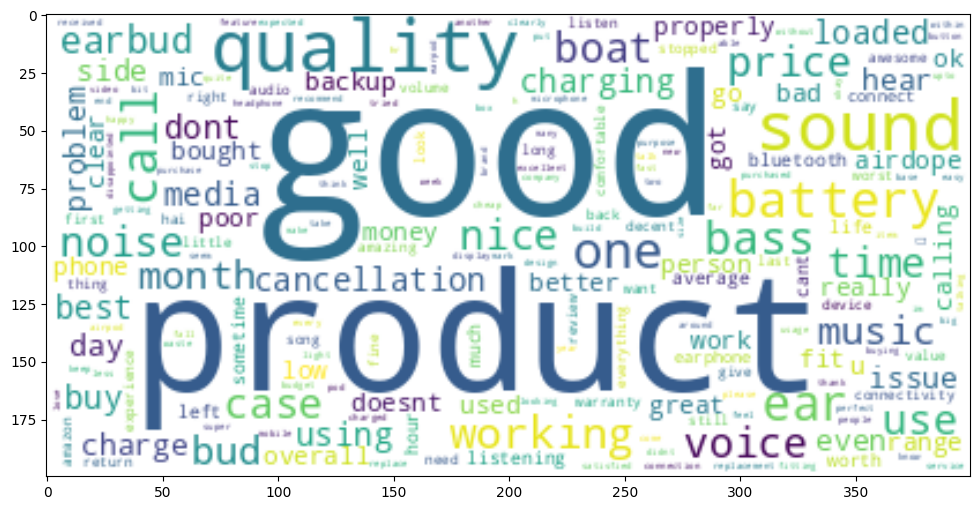

In [ ]:
#word cloud for all words
absolute_clean_reviews_string=' '.join(data2.absolute_clean_reviews)
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(absolute_clean_reviews_string)
plt.imshow(word_cloud, interpolation='bilinear')